# Project showcases usage of Recommendation system algorithm

In [1]:
import numpy as np
import pandas as pd

### Link to data
https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

### Read ratings & movie title data

In [2]:
movie_ratings = pd.read_csv('ratings_small.csv')

In [3]:
# rename columns
columns_1=['User_id', 'Movie_id', 'Rating', 'Timestamp']
movie_ratings.columns=columns_1
movie_ratings.head()

,User_id,Movie_id,Rating,Timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
movie_titles = pd.read_csv("movies_metadata.csv")
movie_titles.columns

c:\users\acer\appdata\local\programs\python\python38-32\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
movie_titles=movie_titles[['id','title']]
columns_2=['Movie_id','Movie_title']
movie_titles.columns=columns_2
movie_titles.head()

,Movie_id,Movie_title
0,862,Toy Story
1,8844,Jumanji
2,15602,Grumpier Old Men
3,31357,Waiting to Exhale
4,11862,Father of the Bride Part II


We can merge them together:

In [6]:
print(movie_ratings.dtypes,'\n\n',movie_titles.dtypes)

User_id        int64
Movie_id       int64
Rating       float64
Timestamp      int64
dtype: object 

 Movie_id       object
Movie_title    object
dtype: object


In [7]:
# try to convert data type but got string values in movie_id column
movie_titles['Movie_id'].astype('int64')

ValueError: invalid literal for int() with base 10: '1997-08-20'

In [8]:
# filter out unwanted rows and convert data type
movie_titles=movie_titles[movie_titles['Movie_id'].str.contains('-')==False]
movie_titles['Movie_id']=movie_titles['Movie_id'].astype('int64')
movie_titles.dtypes

Movie_id        int64
Movie_title    object
dtype: object

In [9]:
# merge ratings & movie title df
movie_ratings_title = pd.merge(movie_ratings,movie_titles,on='Movie_id',how='inner')
movie_ratings_title.head()

,User_id,Movie_id,Rating,Timestamp,Movie_title
0,1,1371,2.5,1260759135,Rocky III
1,4,1371,4.0,949810302,Rocky III
2,7,1371,3.0,851869160,Rocky III
3,19,1371,4.0,855193404,Rocky III
4,21,1371,3.0,853852263,Rocky III


In [10]:
print(movie_ratings_title.shape,'\n\n',movie_ratings_title.sample(8))

(44994, 5) 

        User_id  Movie_id  Rating   Timestamp         Movie_title
20908      334      8873     3.0  1447033619     Wayne's World 2
17251      345      1250     5.0  1106864285         Ghost Rider
38839       48     32031     3.0  1339446959     Let's Get Harry
24574      187       562     4.5  1230361549            Die Hard
22327      654      3396     4.5  1145393174         The Yes Men
36490      362     40629     2.0  1221861669          The Mikado
3086       148       364     4.0  1059604221      Batman Returns
31789       23      8970     4.5  1148672765  The Out-of-Towners


# EDA

Visualisation of no. of ratings and ratings distributions

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [14]:
# a df with mean & no. of ratings
ratings = pd.DataFrame(movie_ratings_title.groupby('Movie_title')['Rating'].mean())
ratings.head()

,Rating
Movie_title,
!Women Art Revolution,3.25
'Gator Bait,0.50
'Twas the Night Before Christmas,4.00
...And God Created Woman,4.00
00 Schneider - Jagd auf Nihil Baxter,4.00


In [15]:
ratings['No. of ratings'] = pd.DataFrame(movie_ratings_title.groupby('Movie_title')['Rating'].count())
ratings.head()

,Rating,No. of ratings
Movie_title,,
!Women Art Revolution,3.25,2
'Gator Bait,0.50,1
'Twas the Night Before Christmas,4.00,2
...And God Created Woman,4.00,1
00 Schneider - Jagd auf Nihil Baxter,4.00,2


<AxesSubplot:>

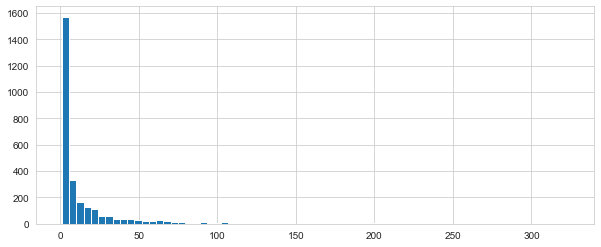

In [16]:
# now show no, of ratings & distributions
plt.figure(figsize=(10,4))
ratings['No. of ratings'].hist(bins=70)

<AxesSubplot:>

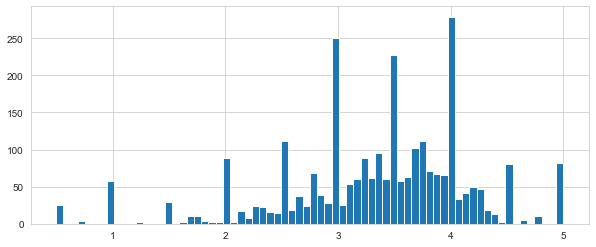

In [18]:
plt.figure(figsize=(10,4))
ratings['Rating'].hist(bins=70)

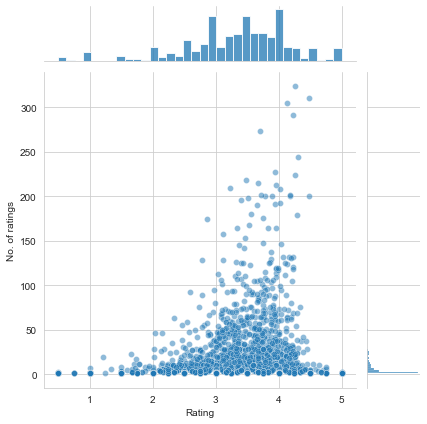

In [19]:
# show relationships with jointplot
sns.jointplot(x='Rating',y='No. of ratings',data=ratings,alpha=0.5)

Now we can see that most movies have 0 rating at all,
most of the popular movies are rated ~ 3.0-4.0

## Recommending Similar Movies

#### Ratings - User_id VS Movie_titles
Now let's create a matrix that has the user ids on one access and the movie title on another axis. Each cell will then consist of the rating the user gave to that movie. NaN values would appear if the movies were not rated by the user.

In [20]:
# include only 'popular movies' that have 100 ratings or more (refer to histogram above)
popular_ratings=ratings[ratings['No. of ratings']>=100]
popular_ratings.head()

,Rating,No. of ratings
Movie_title,,
48 Hrs.,3.902500,200
5 Card Stud,4.182500,200
A Clockwork Orange,3.102941,102
A Nightmare on Elm Street,3.566667,180
A River Runs Through It,4.071970,132


In [21]:
# merge no. of ratings with original df
movie_ratings_title_full=movie_ratings_title.merge(popular_ratings,on='Movie_title',how='right')
columns_dict_1={'Rating_x': 'Ratings', 'Rating_y': 'Ave_rating'}
movie_ratings_title_full = movie_ratings_title_full.rename(columns=columns_dict_1)
movie_ratings_title_full.head()

,User_id,Movie_id,Ratings,Timestamp,Movie_title,Ave_rating,No. of ratings
0,2,150,5.0,835355395,48 Hrs.,3.9025,200
1,5,150,4.0,1163374404,48 Hrs.,3.9025,200
2,15,150,3.0,997939380,48 Hrs.,3.9025,200
3,19,150,3.0,855191289,48 Hrs.,3.9025,200
4,20,150,3.0,1238729755,48 Hrs.,3.9025,200


In [22]:
movie_ratings_title_full.shape

(12830, 7)

In [23]:
moviemat = movie_ratings_title_full.pivot_table(index='User_id',columns='Movie_title',values='Ratings')
moviemat.head()

Movie_title,48 Hrs.,5 Card Stud,A Clockwork Orange,A Nightmare on Elm Street,A River Runs Through It,All the Way Boys,And Then There Were None,Ariel,Arlington Road,Back to the Future Part II,...,The Tunnel,Three Colors: Red,Titanic,To Kill a Mockingbird,Tough Enough,Twin Peaks: Fire Walk with Me,Under the Sand,Wag the Dog,Who Killed Bambi?,Young and Innocent
User_id,,,,,,,,,,,,,,,,,,,,,
2,5.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
3,NaN,NaN,NaN,2.5,NaN,4.5,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.5
4,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,4.0,NaN
5,4.0,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,4.0,NaN,4.5,NaN,4.0,NaN,3.5
6,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# top rated movies
movie_ratings_title_full['Movie_title'].value_counts(ascending=False).head(10)

Terminator 3: Rise of the Machines    324
The Million Dollar Hotel              311
Solaris                               305
The 39 Steps                          291
Monsoon Wedding                       274
Once Were Warriors                    244
Three Colors: Red                     228
Men in Black II                       224
The Passion of Joan of Arc            218
Silent Hill                           215
Name: Movie_title, dtype: int64

#### Let's randomly pick 2 movies: 'Terminator 3: Rise of the Machines', 'Silent Hill'.

Simple algorithm using corrwith, computing pairwise correlation between a moviemat column containing ratings of the desired movie, with the whole moviemat df

In [53]:
def recommender_1(movie_name_1):
    movie_name_1_user_ratings = moviemat[movie_name_1]
    similar_to_movie_name_1 = moviemat.corrwith(movie_name_1_user_ratings)
    corr_movie_name_1 = pd.DataFrame(similar_to_movie_name_1,columns=['Correlation'])
    corr_movie_name_1 = corr_movie_name_1.join(popular_ratings, on='Movie_title')
    corr_movie_name_1['Rating']=round(corr_movie_name_1['Rating'],2)
    top_3_recom=corr_movie_name_1.sort_values('Correlation',ascending=False)[1:4]
    
    return top_3_recom

In [55]:
display(recommender_1('Terminator 3: Rise of the Machines'),recommender_1('Silent Hill'))

,Correlation,Rating,No. of ratings
Movie_title,,,
Men in Black II,0.472422,4.26,224
The Thomas Crown Affair,0.446644,4.29,179
Point Break,0.406478,4.16,132


,Correlation,Rating,No. of ratings
Movie_title,,,
To Kill a Mockingbird,0.629708,3.75,176
Reign Over Me,0.609588,3.61,105
The Searchers,0.583830,3.84,125


#### Findings of recommender_1's results
- 'Men in Black II' is the 1st recommendation for 'Terminator 3: Rise of the Machines', which makes sense since both are in sci-fi genre, the 2nd & 3rd recommendations are in crime & thriller genre.
- Similiarly, "To Kill a Mockingbird" (thriller) is the top recommendation for people who have watched "Silent hill", however 2nd recommendation "Reign Over Me" is a family drama, and "The Searchers" is also a drama, the system may recommend movies only based on popularity.
- Recommendations of sci-fi movies have signaficantly higher average ratings than thriller movies.

### Another recommender system algorithm using cosine similarity

In [56]:
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
moviemat=moviemat.transpose()
moviemat.fillna(0,inplace=True)
similarity_scores = cosine_similarity(moviemat)

In [58]:
similarity_scores.shape

(82, 82)

In [75]:
similarity_scores

array([[1.        , 0.34764422, 0.47836386, ..., 0.48757166, 0.34412949,
        0.34732479],
       [0.34764422, 1.        , 0.19707876, ..., 0.33572123, 0.38898438,
        0.5052505 ],
       [0.47836386, 0.19707876, 1.        , ..., 0.37011113, 0.27839122,
        0.23632594],
       ...,
       [0.48757166, 0.33572123, 0.37011113, ..., 1.        , 0.35140984,
        0.35750239],
       [0.34412949, 0.38898438, 0.27839122, ..., 0.35140984, 1.        ,
        0.44432351],
       [0.34732479, 0.5052505 , 0.23632594, ..., 0.35750239, 0.44432351,
        1.        ]])

In [70]:
def recommender_2(movie_name):
    # index fetch
    index = np.where(moviemat.index==movie_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:4]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = movie_ratings_title_full[movie_ratings_title_full['Movie_title'] == moviemat.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Movie_title')['Movie_title'].values))
        item.extend(list(round(temp_df.drop_duplicates('Movie_title')['Ave_rating'],2).values))
        item.extend(list(temp_df.drop_duplicates('Movie_title')['No. of ratings'].values))
        
        data.append(item)
    
    return data

In [71]:
display(recommender_2('Terminator 3: Rise of the Machines'),recommender_2('Silent Hill'))

[['Solaris', 4.13, 305],
 ['The Million Dollar Hotel', 4.49, 311],
 ['Monsoon Wedding', 3.71, 274]]

[['To Kill a Mockingbird', 3.75, 176],
 ['Batman Returns', 3.78, 200],
 ['Rain Man', 3.52, 198]]

#### Findings of recommender_2's results
Recommendations for 'Terminator 3': Rise of the Machines'(sci-fi):
'Solaris' & 'The Million Dollar Hotel' are popular sci-fi movies with high ratings, however, 'Monsoon Wedding' is a comedy movie with a lower average rating.

Recommendations for 'Silent Hill':
'To Kill a Mockingbird'(Thriller) appears again as the top recommendation, however 'Batman Returns' (hero/crime) & 'Rain Man' (comedy/drama) are also top recommendations

### Recommendations:
1. Movie data with missing titles should be worked out to give a more complete interpretation of users' ratings, 
2. To grasp a deeper understanding of users' preferences, outcomes of adoptions of each recommendations are to be reviewed & referred at certain time intervals.
3. Other features such as 'total watch time', 'total click times', 'comments to movies' (may adopt NLP algorithms) might be also valueable to be included in the recommender system algorithm.